In [23]:
CAMDA.DF<- read.table(header = TRUE, sep=",", text = "
                      Method,Test/Train,Cell Line,Accuracy,Sensitivity,Specificity,MCC
                      Ensemble,Training,MCF7,0.673684210526,0.684782608696,0.333333333333,0.00681550683425
                      logReg,Training,MCF7,0.621052631579,0.676829268293,0.269230769231,-0.0398815415334
                      RF,Training,MCF7,0.694736842105,0.71686746988,0.541666666667,0.184769489324
                      Ensemble,Test,MCF7,0.6976744186046512,0.7733333333333333,0.18181818181818182,-0.03610443457402982
                      logReg,Test,MCF7,0.5813953488372093,0.7719298245614035,0.20689655172413793,-0.024127782859998507
                      RF,Test,MCF7,0.7093023255813954,0.7692307692307693,0.125,-0.07405211022042771
                      Ensemble,Training,PC3,0.678947368421,0.690607734807,0.444444444444,0.0617184253701
                      logReg,Training,PC3,0.7,0.718562874251,0.565217391304,0.199139330639
                      RF,Training,PC3,0.663157894737,0.685393258427,0.333333333333,0.0097996838673
                      RF,Test,PC3,0.6627906976744186,0.7714285714285715,0.1875,-0.03852428778881295
                      Ensemble,Test,PC3,0.7093023255813954,0.7692307692307693,0.125,-0.07405211022042771
                      logReg,Test,PC3,0.6511627906976745,0.7534246575342466,0.07692307692307693,-0.1464800798340647")

In [21]:
library('dplyr')
my.df <- read.table('updated_svm.csv', header = TRUE, sep = ",")
# my.df
CAMDA.DF <- filter(my.df, Data_Version == "orig_scan") %>% select(Method, Test.Train, Cell.Line, Accuracy, Sensitivity, Specificity, MCC)

Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”

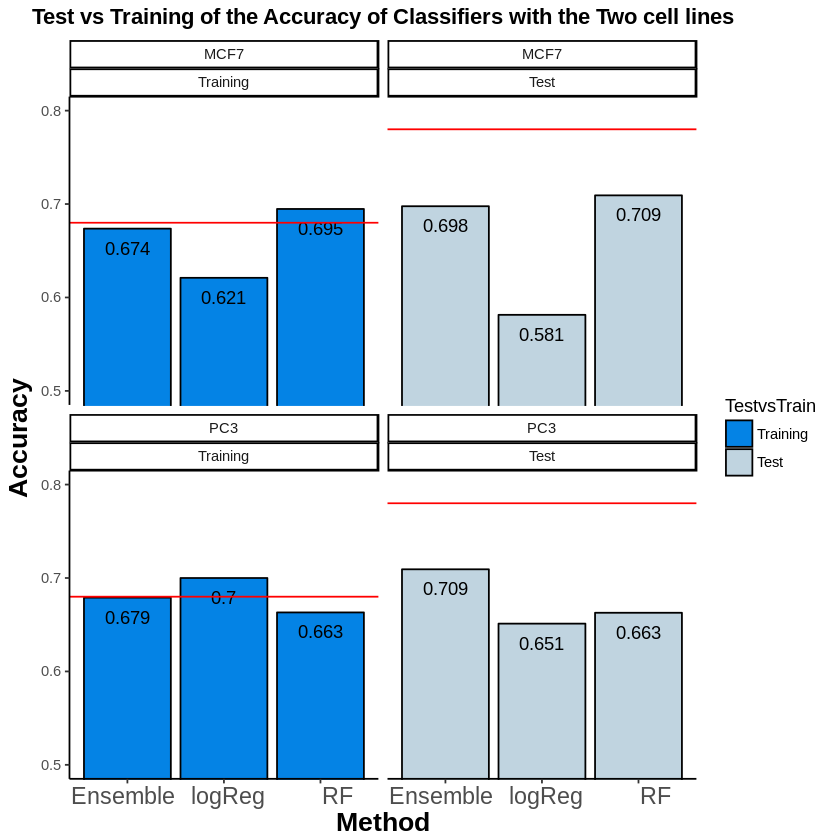

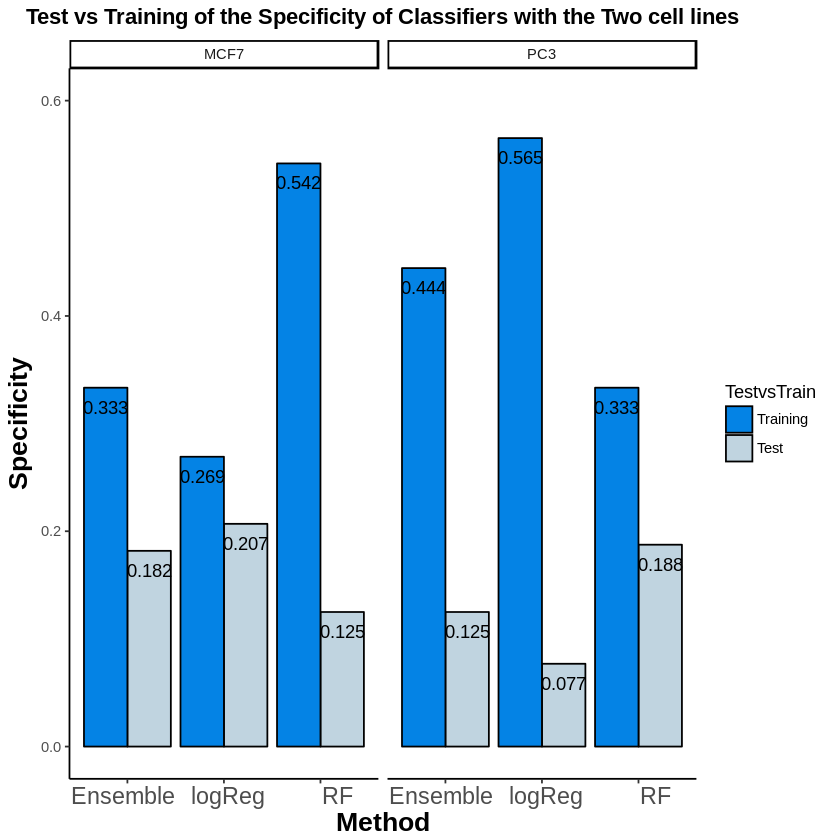

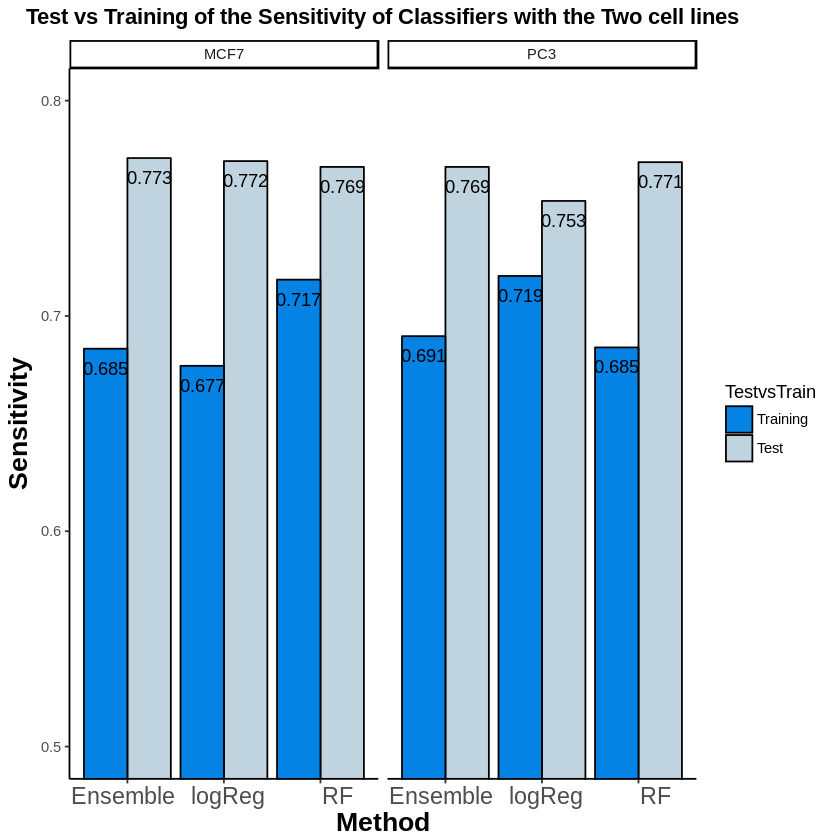

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


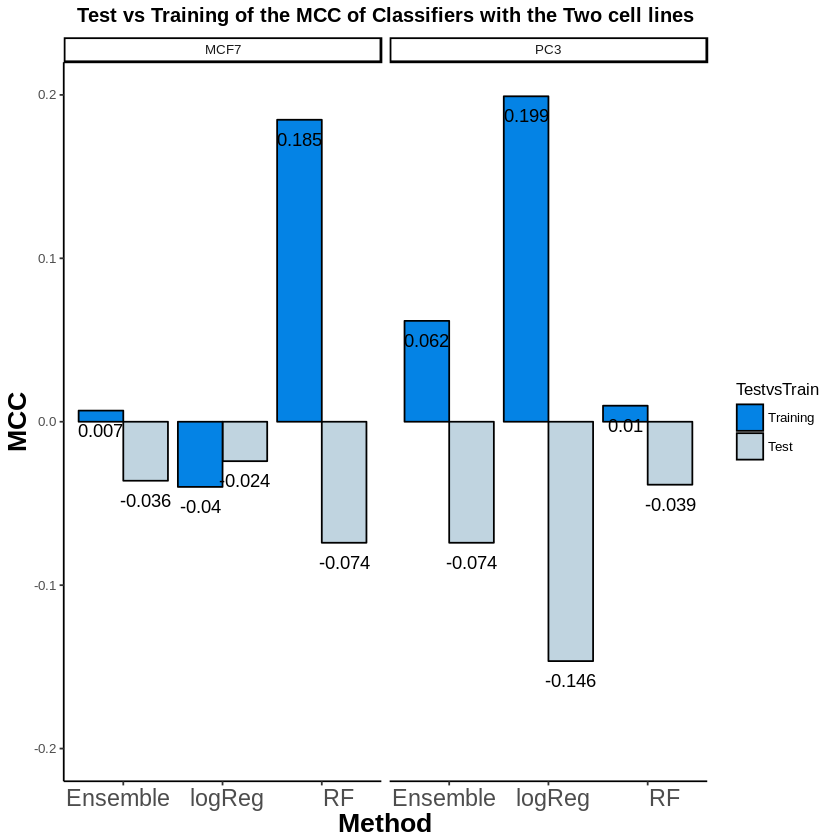

In [24]:
library("plyr")
library("ggplot2")
library("tibble")

CAMDA.DF$Test.Train <- factor(as.character(CAMDA.DF$Test.Train),levels = c("Training","Test"))

acc <- ggplot(CAMDA.DF, aes(CAMDA.DF$Method, CAMDA.DF$Accuracy)) +   
          geom_bar(aes(fill = CAMDA.DF$Test.Train), position = "dodge",colour="black", stat="identity") + 
          labs(x = "Method", y = "Accuracy", title = "Test vs Training of the Accuracy of Classifiers with the Two cell lines") +
          guides(fill=guide_legend(title="TestvsTrain")) +
          geom_text(aes(fill=CAMDA.DF$Test.Train, label=round(as.numeric(as.character(CAMDA.DF$Accuracy)), 3)), position=position_dodge(width=0.9), vjust=2) +
          theme_classic() + 
          facet_wrap(~Cell.Line+Test.Train) +
          geom_hline(data=as_tibble(CAMDA.DF[CAMDA.DF$Test.Train == "Training",]), aes(yintercept=.68), colour="red") + 
          geom_hline(data=as_tibble(CAMDA.DF[CAMDA.DF$Test.Train == "Test",]), aes(yintercept=.78), colour="red") + 
          scale_fill_manual("legend", values = c("#0483e5", "#c0d4e0")) +
          theme(plot.title = element_text(hjust = 0.5, face="bold"),
                axis.text.x=element_text(hjust=.8,size=14),
                axis.title=element_text(size=16,face="bold")) +
          coord_cartesian(ylim = c(.5, .8)) 

Sens <- ggplot(CAMDA.DF, aes(CAMDA.DF$Method, CAMDA.DF$Sensitivity)) +   
          geom_bar(aes(fill = CAMDA.DF$Test.Train), position = "dodge",colour="black", stat="identity") + 
          labs(x = "Method", y = "Sensitivity", title = "Test vs Training of the Sensitivity of Classifiers with the Two cell lines") +
          guides(fill=guide_legend(title="TestvsTrain")) +
          geom_text(aes(fill=CAMDA.DF$Test.Train, label=round(as.numeric(as.character(CAMDA.DF$Sensitivity)), 3)), position=position_dodge(width=0.9), vjust=2) +
          theme_classic() + 
          facet_wrap(~Cell.Line) +
          scale_fill_manual("legend", values = c("#0483e5", "#c0d4e0")) +
          theme(#axis.text.y=element_blank(),
                #axis.ticks.y=element_blank(),
                #axis.line.y=element_blank(),
                plot.title = element_text(hjust = 0.5, face="bold"),
                #legend.position="none",
                axis.text.x=element_text(hjust=.8,size=14),
                axis.title=element_text(size=16,face="bold")) +
          coord_cartesian(ylim = c(.5, .8)) 

Specif <- ggplot(CAMDA.DF, aes(CAMDA.DF$Method, CAMDA.DF$Specificity)) +   
          geom_bar(aes(fill = CAMDA.DF$Test.Train), position = "dodge",colour="black", stat="identity") + 
          labs(x = "Method", y = "Specificity", title = "Test vs Training of the Specificity of Classifiers with the Two cell lines") +
          guides(fill=guide_legend(title="TestvsTrain")) +
          geom_text(aes(fill=CAMDA.DF$Test.Train, label=round(as.numeric(as.character(CAMDA.DF$Specificity)), 3)), position=position_dodge(width=0.9), vjust=2) +
          theme_classic() + 
          facet_wrap(~Cell.Line) +
          scale_fill_manual("legend", values = c("#0483e5", "#c0d4e0")) +
          theme(#axis.text.y=element_blank(),
                #axis.ticks.y=element_blank(),
                #axis.line.y=element_blank(),
                plot.title = element_text(hjust = 0.5, face="bold"),
                #legend.position="none",
                axis.text.x=element_text(hjust=.8,size=14),
                axis.title=element_text(size=16,face="bold")) +
          coord_cartesian(ylim = c(0, .6)) 

MCC <- ggplot(CAMDA.DF, aes(CAMDA.DF$Method, CAMDA.DF$MCC)) +   
          geom_bar(aes(fill = CAMDA.DF$Test.Train), position = "dodge",colour="black", stat="identity") + 
          labs(x = "Method", y = "MCC", title = "Test vs Training of the MCC of Classifiers with the Two cell lines") +
          guides(fill=guide_legend(title="TestvsTrain")) +
          geom_text(aes(fill=CAMDA.DF$Test.Train, label=round(as.numeric(as.character(CAMDA.DF$MCC)), 3)), position=position_dodge(width=0.9), vjust=2) +
          theme_classic(base_size=10) + #
          facet_wrap(~Cell.Line) +
          scale_fill_manual("legend", values = c("#0483e5", "#c0d4e0")) +
          #geom_hline(data = CAMDA.DF, mapping = aes(yintercept = function(){if (CAMDA.DF$Test.Train == "Test") return(0.5) else return(0.1)}() ) ) +
          theme(#axis.text.y=element_blank(),
                #axis.ticks.y=element_blank(),
                #axis.line.y=element_blank(),
                plot.title = element_text(hjust = 0.5, face="bold"),
                #legend.position="none",
                axis.text.x=element_text(hjust=.8,size=14),
                axis.title=element_text(size=16,face="bold")) +
          coord_cartesian(ylim = c(-.2, .2)) 

acc
Specif
Sens ##.5 to .8 y axis ## cowplot
MCC
ggsave("acc.png",acc)
ggsave("Specif.png",Specif)
ggsave("Sens.png",Sens)
ggsave("MCC.png",MCC)